In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Energy Efficiency Regression data.csv')
df.head()

,Relative Compactness,Surface Area,Wall Area,Roof Area,Overall Height,Orientation,Glazing Area,Glazing Area Distribution,Heating Load,Cooling Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
Relative Compactness         768 non-null float64
Surface Area                 768 non-null float64
Wall Area                    768 non-null float64
Roof Area                    768 non-null float64
Overall Height               768 non-null float64
Orientation                  768 non-null int64
Glazing Area                 768 non-null float64
Glazing Area Distribution    768 non-null int64
Heating Load                 768 non-null float64
Cooling Load                 768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
df.shape

(768, 10)

In [5]:
# Check for number of unique values per column
print("Number of unique values:")
for col in df.columns:
    uni_num = df[col].nunique()
    print('{} = {}'.format(str(col), str(uni_num)))

Number of unique values:
Relative Compactness = 12
Surface Area = 12
Wall Area = 7
Roof Area = 4
Overall Height = 2
Orientation = 4
Glazing Area = 4
Glazing Area Distribution = 6
Heating Load = 586
Cooling Load = 636


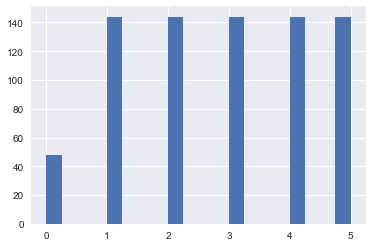

In [6]:
df['Glazing Area Distribution'].hist(bins=20)

In [7]:
x = df.drop(['Heating Load', 'Cooling Load'], axis =1)
y1 = df['Heating Load']
y2 = df['Cooling Load']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train1, X_test1, y_train_heat, y_test_heat = train_test_split(x, y1, test_size =0.3)
X_train2, X_test2, y_train_cool, y_test_cool = train_test_split(x, y2, test_size =0.3)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()
pred_heat = lr.fit(X_train1, y_train_heat).predict(X_test1)
pred_cool = lr.fit(X_train2, y_train_cool).predict(X_test2)

In [12]:
from sklearn.metrics import r2_score

In [13]:
print('R squared score:', r2_score(y_test_heat, pred_heat))
print('R squared score:', r2_score(y_test_cool, pred_cool))

R squared score: 0.9232018382633213
R squared score: 0.8768111427259109


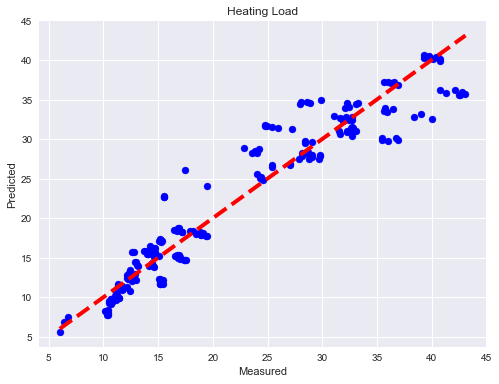

In [14]:
#plt.figure(figsize=(20,10))
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test_heat, pred_heat, color = 'b')
ax.plot([y_test_heat.min(), y_test_heat.max()], [y_test_heat.min(), y_test_heat.max()], 'k--', lw=4, color = 'r')
ax.set_title('Heating Load')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

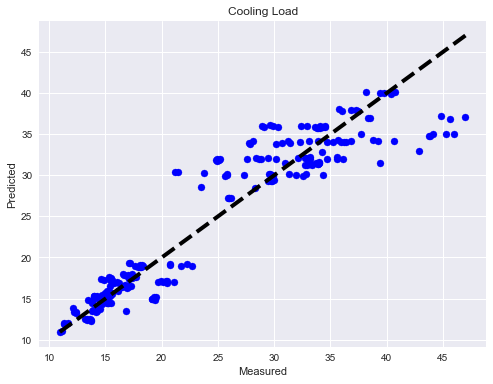

In [15]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(y_test_cool, pred_cool, color = 'b')
ax.plot([y_test_cool.min(), y_test_cool.max()], [y_test_cool.min(), y_test_cool.max()], 'k--', lw=4)
ax.set_title('Cooling Load')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
rfr = RandomForestRegressor(n_estimators = 10)
pred_heat1 = rfr.fit(X_train1, y_train_heat).predict(X_test1)
pred_cool1 = rfr.fit(X_train2, y_train_cool).predict(X_test2)

In [18]:
print('R squared score:', r2_score(y_test_heat, pred_heat1))
print('R squared score:', r2_score(y_test_cool, pred_cool1))

R squared score: 0.9969823747992991
R squared score: 0.9715351217185149


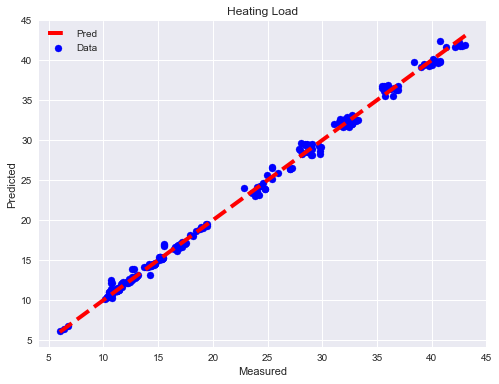

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test_heat, pred_heat1, color = 'b', label = 'Data')
ax.plot([y_test_heat.min(), y_test_heat.max()], [y_test_heat.min(), y_test_heat.max()], 'k--', lw=4, color = 'r', label = 'Pred')
ax.set_title('Heating Load')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.legend(loc='best')

In [20]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 5)

In [21]:
x = df.drop(['Heating Load', 'Cooling Load'], axis =1)
y1 = df['Heating Load']
y2 = df['Cooling Load']

In [22]:
x_new = poly.fit_transform(x)

In [23]:
X_train1, X_test1, y_train_heat, y_test_heat = train_test_split(x, y1, test_size =0.3)
X_train2, X_test2, y_train_cool, y_test_cool = train_test_split(x, y2, test_size =0.3)

In [24]:
pred_heat_t = lr.fit(X_train1, y_train_heat).predict(X_train1)
pred_cool_t = lr.fit(X_train2, y_train_cool).predict(X_train2)
pred_heat = lr.fit(X_train1, y_train_heat).predict(X_test1)
pred_cool = lr.fit(X_train2, y_train_cool).predict(X_test2)

In [25]:
print('R squared score Train:', r2_score(y_train_heat, pred_heat_t))
print('R squared score CV:', r2_score(y_test_heat, pred_heat))
print('\n')
print('R squared score Train:', r2_score(y_train_cool, pred_cool_t))
print('R squared score CV:', r2_score(y_test_cool, pred_cool))

R squared score Train: 0.9165819487337357
R squared score CV: 0.913386343916442


R squared score Train: 0.8817979300775645
R squared score CV: 0.8989584845341942


In [26]:
from sklearn.model_selection import KFold, cross_val_predict

In [31]:
cv = KFold(n_splits=20)
prediction_cv = cross_val_predict(lr, x, y1, cv=cv)

In [32]:
print('Accuracy:', r2_score(y1, prediction_cv))

Accuracy: 0.9073302406174596
